In [9]:
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


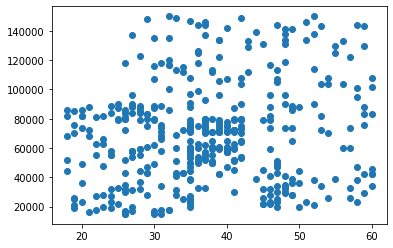

In [10]:
#Data Visulaization

import matplotlib.pyplot as plt
plt.scatter(df["Age"],df["EstimatedSalary"])
plt.show()

In [11]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

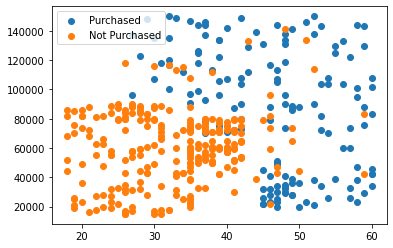

In [12]:
df_p = df[df['Purchased']==1]
df_np = df[df['Purchased']==0]
plt.scatter(df_p["Age"],df_p["EstimatedSalary"], label = 'Purchased')
plt.scatter(df_np["Age"],df_np["EstimatedSalary"], label = 'Not Purchased')
plt.legend()
plt.show()

In [13]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.33, random_state = 42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
400*0.33

132.0

In [17]:
print(x_train.shape)
print(x_test.shape)

(268, 2)
(132, 2)


In [21]:
import numpy as np
np.unique(y_test, return_counts= 1)

(array([0, 1], dtype=int64), array([80, 52], dtype=int64))

In [22]:
import math
math.sqrt(268)

16.3707055437449

In [23]:
#k = 17, sqrt of 268

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [24]:
# Predicting the test value

y_pred = neigh.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [25]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9393939393939394

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[76,  4],
       [ 4, 48]], dtype=int64)

In [28]:
# Test data : 132 (80 Not Purchased, 52 Purchased)

# 77 -- True Not Purchased
# 3 -- False Not Purchased
# 25 -- True Purchased
# 27 -- False Purchased

#Accuracy = (True Values) / (Sum of all values)

(77+25) / (27+3+77+25)

0.7727272727272727

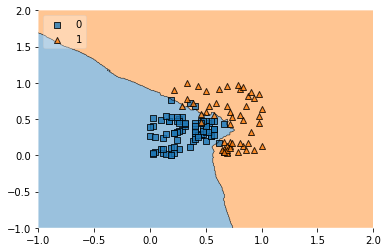

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test, y_test, clf = neigh, legend = 2)
plt.show()